In [1]:
# Make all of the comments pink
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: pink; }</style>"))

C:\Users\ranra\AppData\Local\Temp\ipykernel_7512\1452405279.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Imports

In [2]:
import os # File path structure
import shutil # Help with folder structure
import random # Move random files
import time # Used in opencv for captuing images
import uuid # Import uuid library to generate unique image names
import cv2 
import tensorflow as tf
import json # labels in json format
import numpy as np
from matplotlib import pyplot as plt 
import albumentations as alb # Image augmentation
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16 # Pretrained from Imagenet
from tensorflow.keras.models import load_model # Load saved model

In [3]:
# Example of unique id identifier 
uuid.uuid1()

UUID('6e49d0a7-66b7-11ed-8614-085bd665a724')

# Folder Sturcture & Collect Images Using OpenCV

In [4]:
# Main
MAIN = 'data'
#Archive
Arch_image = os.path.join('image archive')
Arch_label = os.path.join('label archive')
# Where main images and labels are located
IMAGES_PATH = os.path.join(MAIN, 'image')
Label_path = os.path.join(MAIN, 'label')
# Test path
Test_path = os.path.join(MAIN, 'test')
Test_image_path = os.path.join(Test_path, 'image')
Test_label_path = os.path.join(Test_path, 'label')
# Validation path
Val_path = os.path.join(MAIN, 'val')
Val_image_path = os.path.join(Val_path, 'image')
Val_label_path = os.path.join(Val_path, 'label')
# Train path
Train_path = os.path.join(MAIN, 'train')
Train_image_path = os.path.join(Train_path, 'image')
Train_label_path = os.path.join(Train_path, 'label')
# Augmented path
Aug_path = os.path.join(MAIN, 'aug_data')
# Augmented Train
Aug_train_path = os.path.join(Aug_path, 'train')
Aug_train_image_path = os.path.join(Aug_train_path, 'image')
Aug_train_label_path = os.path.join(Aug_train_path, 'label')
# Augmented Test
Aug_test_path = os.path.join(Aug_path, 'test')
Aug_test_image_path = os.path.join(Aug_test_path, 'image')
Aug_test_label_path = os.path.join(Aug_test_path, 'label')
# Augmented Validation
Aug_val_path = os.path.join(Aug_path, 'val')
Aug_val_image_path = os.path.join(Aug_val_path, 'image')
Aug_val_label_path = os.path.join(Aug_val_path, 'label')


In [5]:
# Make the directories
# I honestly just delete the folders before rerunning the entire script if I put new pictures in to preprocess
# Checking if there is a data root file
if os.path.exists(MAIN):
# Remove files directories
    for f in os.listdir(Train_image_path):
        os.remove(os.path.join(Train_image_path, f))
    for f in os.listdir(Train_label_path):
        os.remove(os.path.join(Train_label_path, f))
    for f in os.listdir(Val_label_path):
        os.remove(os.path.join(Val_label_path, f))
    for f in os.listdir(Val_image_path):
        os.remove(os.path.join(Val_image_path, f))
    for f in os.listdir(Test_label_path):
        os.remove(os.path.join(Test_label_path, f))
    for f in os.listdir(Test_image_path):
        os.remove(os.path.join(Test_image_path, f))
    for f in os.listdir(Aug_val_label_path):
        os.remove(os.path.join(Aug_val_label_path, f))
    for f in os.listdir(Aug_val_image_path):
        os.remove(os.path.join(Aug_val_image_path, f))
    for f in os.listdir(Aug_test_label_path):
        os.remove(os.path.join(Aug_test_label_path, f))
    for f in os.listdir(Aug_test_image_path):
        os.remove(os.path.join(Aug_test_image_path, f))
    for f in os.listdir(Aug_train_label_path):
        os.remove(os.path.join(Aug_train_label_path, f))
    for f in os.listdir(Aug_train_image_path):
        os.remove(os.path.join(Aug_train_image_path, f))
try:
    os.makedirs(Aug_train_image_path)
    os.makedirs(Aug_train_label_path)
    os.makedirs(Aug_test_image_path)
    os.makedirs(Aug_test_label_path)
    os.makedirs(Aug_val_image_path)
    os.makedirs(Aug_val_label_path)
    os.makedirs(Train_image_path)
    os.makedirs(Train_label_path)
    os.makedirs(Val_label_path)
    os.makedirs(Val_image_path)
    os.makedirs(Test_label_path)
    os.makedirs(Test_image_path)
    os.makedirs(IMAGES_PATH)
    os.makedirs(Label_path)
except FileExistsError:
    pass

In [6]:
# For use with function use_webcam()
number_images = 30

In [7]:
# I will use the function when I want some pictures
def use_webcam():
    # load webcam
    cap = cv2.VideoCapture(0)  # 0 for default webcam and index up if you have more then they are other numbers

    for imgnum in range(number_images): # Loop through number of images
        print('Collecting image {}'.format(imgnum))# Print out we are collecting image and which image we're up to
        ret, frame = cap.read()  # Read our capture in a point and time
        imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')# Defines the name of the file we are passing through
        cv2.imwrite(imgname, frame) # write out the file names 
        cv2.imshow('frame', frame) # Makes us see it
        time.sleep(0.5) # sleep for half a sec between each frame

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

#use_webcam()

In [8]:
# When I take new pictures I have to label them
# https://github.com/wkentaro/labelme

def labelme():
    !labelme
# labelme()

## Image to Archive

In [9]:
# So I Don't have to take new pictures all the time
# I delete the positive files every rerun so I have a place I archive all my file
if not os.path.exists(Arch_image):
    os.makedirs(Arch_image)
    
# Copies all the positive files to archive folder
for file_name in os.listdir(IMAGES_PATH):
    full_file_name = os.path.join(IMAGES_PATH, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, Arch_image)

# Copies all the archive files to positive folder
for file_name in os.listdir(Arch_image):
    full_file_name = os.path.join(Arch_image, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, IMAGES_PATH)

## Label to Archive

In [10]:
# So I Don't have to take new pictures all the time
# I delete the positive files every rerun so I have a place I archive all my file
if not os.path.exists(Arch_label):
    os.makedirs(Arch_label)
    
# Copies all the positive files to archive folder
for file_name in os.listdir(Label_path):
    full_file_name = os.path.join(Label_path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, Arch_label)

# Copies all the archive files to positive folder
for file_name in os.listdir(Arch_label):
    full_file_name = os.path.join(Arch_label, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, Label_path)

# Preprocressing

In [11]:
images = tf.data.Dataset.list_files('data\\image\\*.jpg')

In [12]:
# Example image and it's path
images.as_numpy_iterator().next()

b'data\\image\\be6d184f-66b1-11ed-9833-085bd665a724.jpg'

In [13]:
def load_image(x): 
    # Read in image from file path
    byte_img = tf.io.read_file(x)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    return img

In [14]:
# applies load image on each image
images = images.map(load_image)

In [15]:
# Example image and it's path
images.as_numpy_iterator().next()

array([[[111, 106, 100],
        [110, 105,  99],
        [109, 104,  98],
        ...,
        [ 93, 119, 203],
        [ 93, 118, 202],
        [ 92, 117, 201]],

       [[111, 106, 100],
        [110, 105,  99],
        [109, 104,  98],
        ...,
        [ 91, 118, 199],
        [ 91, 117, 201],
        [ 90, 117, 198]],

       [[110, 105, 101],
        [110, 105, 101],
        [109, 104,  98],
        ...,
        [ 89, 118, 196],
        [ 88, 117, 197],
        [ 88, 117, 195]],

       ...,

       [[ 12,   7,   4],
        [ 12,   7,   4],
        [ 12,   7,   4],
        ...,
        [137,  89,  75],
        [156, 112, 101],
        [149, 106,  97]],

       [[ 14,   7,   1],
        [ 14,   7,   1],
        [ 14,   6,   3],
        ...,
        [129,  80,  66],
        [152, 105,  97],
        [148, 103,  97]],

       [[ 15,   6,   0],
        [ 15,   6,   0],
        [ 14,   7,   1],
        ...,
        [124,  75,  61],
        [148,  99,  92],
        [150, 103,  97]]

In [16]:
image_generator = images.batch(4).as_numpy_iterator()

In [17]:
plot_images = image_generator.next()

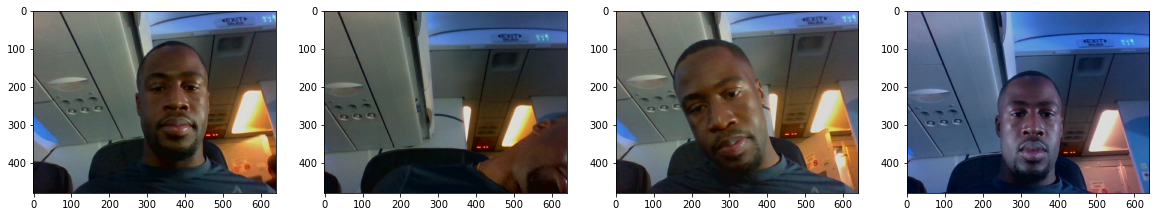

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## Splitting Data

In [19]:
train_split = round(len(images) * .7)
test_split = round(len(images) * .16)
val_split = len(images) - (train_split + test_split)
print(f'There are {train_split} in the train split\n')
print(f'There are {test_split} in the test split\n')
print(f'There are {val_split} in the validation split')

There are 63 in the train split

There are 14 in the test split

There are 13 in the validation split


In [20]:
# Spliting training data
for file_name in random.sample(os.listdir(IMAGES_PATH), train_split):
    shutil.move(os.path.join(IMAGES_PATH, file_name), Train_image_path)
# Spliting testing data
for file_name in random.sample(os.listdir(IMAGES_PATH), test_split):
    shutil.move(os.path.join(IMAGES_PATH, file_name), Test_image_path)
# Spliting validation data
for file_name in random.sample(os.listdir(IMAGES_PATH), val_split):
    shutil.move(os.path.join(IMAGES_PATH, file_name), Val_image_path)

In [21]:
# Move the Matching Labels
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'image')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','label', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'label',filename)
            os.replace(existing_filepath, new_filepath)      

# Image Augmentation

In [22]:
# Augmentations pipeline 
# https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), # Cut images down to 450x450
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

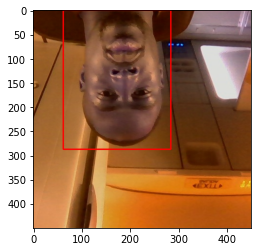

In [23]:
# print augmented image with bounding box
# Load a Test Image and Annotation with OpenCV and JSON
img = cv2.imread(os.path.join('data','train', 'image','b7b26bf1-66b1-11ed-b3d8-085bd665a724.jpg'))

with open(os.path.join('data', 'train', 'label', 'b7b26bf1-66b1-11ed-b3d8-085bd665a724.json'), 'r') as f:
    label = json.load(f)
    
#Extract Coordinates and Rescale to Match Image Resolution These are for the red box
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

coords = list(np.divide(coords, [640,480,640,480]))

# Apply Augmentations and View Results
augmented = augmentor(image=img, bboxes=[coords], class_labels=['Ranaldo'])

cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [24]:
# Load a Test Image and Annotation with OpenCV and JSON
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'image')):
        img = cv2.imread(os.path.join('data', partition, 'image', image))

        coords = [0,0,0.00001,0.00001] # default coordinates if annotations don't exist
        label_path = os.path.join('data', partition, 'label', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path): # check if an annotation exist
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            #Extract Coordinates and Rescale to Match Image Resolution
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
            
        # Apply Augmentations and View Results
        try: 
            for x in range(60): # 60 augmentations for every image
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['Ranaldo'])
                cv2.imwrite(os.path.join(Aug_path, partition, 'image', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join(Aug_path, partition, 'label', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.6653439153439153, 0.984457671957672, 0.35449735449735453, 0.37709435626102294, 'Ranaldo'].
x_max is less than or equal to x_min for bbox [0.648809523809524, 0.9624118165784832, 0.359457671957672, 0.31205908289241624, 'Ranaldo'].
image must be numpy array type
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.5438161375661374, 0.9083994708994709, 0.08085317460317465, 0.27899029982363316, 'Ranaldo'].
x_max is less than or equal to x_min for bbox [0.5487764550264551, 0.8676146384479717, 0.1420304232804233, 0.2470238095238095, 'Ranaldo'].
x_max is less than or equal to x_min for bbox [0.683531746031746, 0.8852513227513228, 0.36524470899470896, 0.24812610229276896, 'Ranaldo'].
y_max is less than or equal to y_min for bbox [0.3644179894179894, 0.8477733686067019, 0.6868386243386244, 0.24151234567901234, 'Ranaldo'].
image must be numpy array type
image must be numpy array type
x_max is less than or equal to x_min f

# Load Data

## Load Augmented Images to Tensorflow Dataset

In [25]:
train_images = tf.data.Dataset.list_files('data\\aug_data\\train\\image\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [26]:
test_images = tf.data.Dataset.list_files('data\\aug_data\\test\\image\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [27]:
val_images = tf.data.Dataset.list_files('data\\aug_data\\val\\image\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [28]:

print(f'There are {len(train_images)} training images\n')
print(f'There are {len(test_images)} testing images\n')
print(f'There are {len(val_images)} validation images')

There are 480 training images

There are 120 testing images

There are 300 validation images


## Build Label Loading Function

In [29]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## Load Labels to Tensorflow Dataset

In [30]:
train_labels = tf.data.Dataset.list_files('data\\aug_data\\train\\label\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
test_labels = tf.data.Dataset.list_files('data\\aug_data\\test\\label\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
val_labels = tf.data.Dataset.list_files('data\\aug_data\\val\\label\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

## Combine Data

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(480, 480, 120, 120, 300, 300)

In [35]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000) # Bigger than how many images I have
train = train.batch(8)
train = train.prefetch(4)

In [36]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [37]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [38]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

# View Images and Annotations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


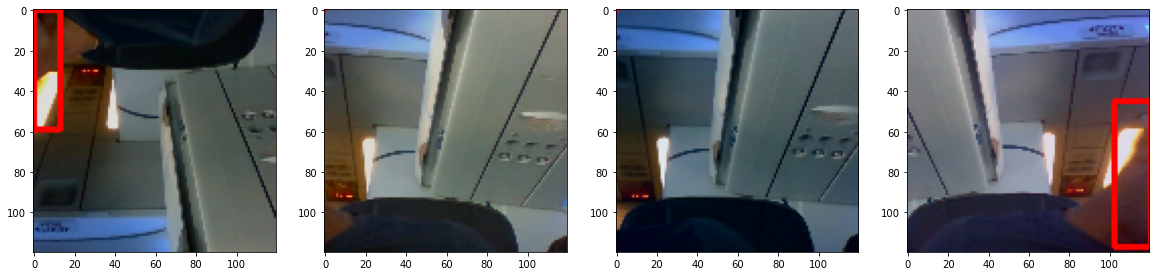

In [39]:
data_samples = train.as_numpy_iterator()

res = data_samples.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# Building the model
I'll use classification to determine if it's the right image or not and regression for the boxes

In [40]:
# I don't want to include thge top because I want to customize the final layers
vgg = VGG16(include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [41]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box (Regression) model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [42]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

# Losses and Optimizers

In [43]:
# How much the learning rate drops after each epochs
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [44]:
# Localization is where in the picture the thing is your detecting
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) # Get distance between actual coordinate and predicted
    # Actual height and width              
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 
    # Predicted height and width     
    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size # Give localization loss

In [45]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

# Model  & Train

In [46]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): # initial parameters
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
        
    # Perform the training
    def train_step(self, batch, **kwargs): 
        
        X, y = batch # split image and labels
        
        with tf.GradientTape() as tape: 
            # Make a prediction
            classes, coords = self.model(X, training=True)
            # Calculate the loss
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            # Calculate the gradients
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        # Apply gradient decent across all variables
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [47]:
model = FaceTracker(facetracker)

In [48]:
model.compile(opt, classloss, regressloss)

In [49]:
# Review model performance
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
60/60 [==============================] - 126s 2s/step - total_loss: 1.7177 - class_loss: 0.4489 - regress_loss: 1.4932 - val_total_loss: 7.5953 - val_class_loss: 9.1634 - val_regress_loss: 3.0136
Epoch 2/15
60/60 [==============================] - 122s 2s/step - total_loss: 0.5137 - class_loss: 0.1307 - regress_loss: 0.4484 - val_total_loss: 5.2336 - val_class_loss: 4.9959 - val_regress_loss: 2.7357
Epoch 3/15
60/60 [==============================] - 123s 2s/step - total_loss: 0.3453 - class_loss: 0.1068 - regress_loss: 0.2919 - val_total_loss: 6.2805 - val_class_loss: 6.5605 - val_regress_loss: 3.0003
Epoch 4/15
60/60 [==============================] - 122s 2s/step - total_loss: 0.1863 - class_loss: 0.0487 - regress_loss: 0.1620 - val_total_loss: 5.6432 - val_class_loss: 5.4631 - val_regress_loss: 2.9116
Epoch 5/15
60/60 [==============================] - 123s 2s/step - total_loss: 0.1961 - class_loss: 0.0573 - regress_loss: 0.1674 - val_total_loss: 5.8344 - val_class_loss:

# Plot Performance

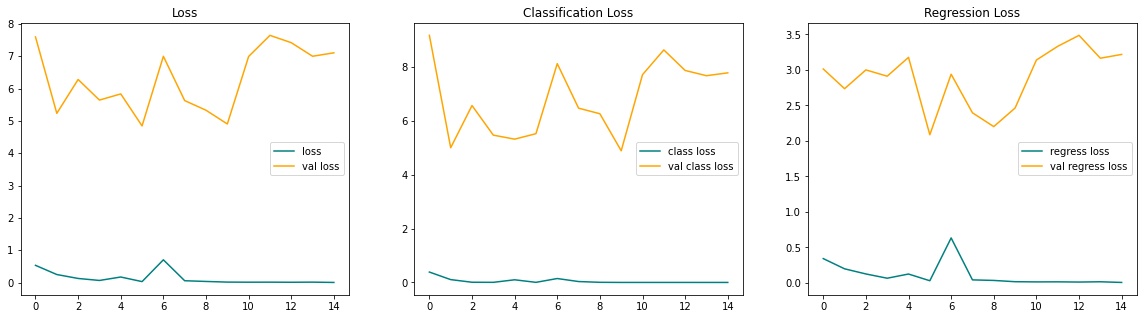

In [51]:
hist.history
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# Make Predictions on Test Set

1/1 [==============================] - 1s 768ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


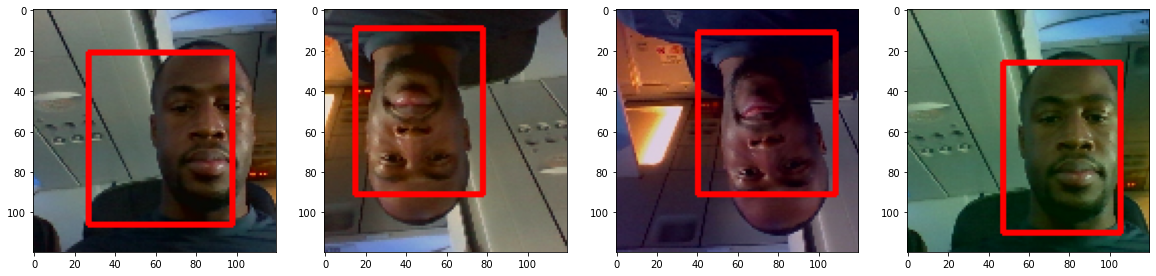

In [52]:
test_data = test.as_numpy_iterator()

test_sample = test_data.next()

yhat = facetracker.predict(test_sample[0])

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

# Save the Model

In [53]:
facetracker.save('facetrackerv2.h5')
# facetracker = load_model('facetracker.h5')
facetracker = load_model('facetrackerv2.h5')

# Real Time Detection

In [54]:
def Real_Test():    
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        _ , frame = cap.read()
        frame = frame[50:500, 50:500,:]

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120,120))

        yhat = facetracker.predict(np.expand_dims(resized/255,0))
        sample_coords = yhat[1][0]

        if yhat[0] > 0.5: 
            # Controls the main rectangle
            cv2.rectangle(frame, 
                          tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                                (255,0,0), 2)
            # Controls the label rectangle
            cv2.rectangle(frame, 
                          tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                        [0,-30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                        [80,0])), 
                                (255,0,0), -1)

            # Controls the text rendered
            cv2.putText(frame, 'Ranaldo', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                                   [0,-5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        cv2.imshow('EyeTrack', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [55]:
Real_Test()

1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 60ms/step
